# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1_l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [29]:
#LOAD THE DATA
df = pd.read_csv('water_potability.csv')
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [30]:
# Handling missing values (filling with mean)
df.fillna(df.mean(), inplace=True)

# Check for missing data
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [31]:
# Splitting features and target
X = df.drop(columns=['Potability'])
y = df['Potability']

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Each Memeber Defines their model Here

In [32]:
# Define the Model
model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001), input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Define optimizer with custom learning rate
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Display Model Summary
model.summary()

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

# Start the training Process

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6806 - loss: 0.6427 - val_accuracy: 0.6497 - val_loss: 0.6661
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6741 - loss: 0.6451 - val_accuracy: 0.6701 - val_loss: 0.6610
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6544 - loss: 0.6566 - val_accuracy: 0.6701 - val_loss: 0.6599
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6673 - loss: 0.6471 - val_accuracy: 0.6538 - val_loss: 0.6639
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6577 - loss: 0.6521 - val_accuracy: 0.6619 - val_loss: 0.6602
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6698 - loss: 0.6459 - val_accuracy: 0.6680 - val_loss: 0.6615
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6525 - loss: 0.6525 - val_accuracy: 0.6619 - val_loss: 0.6601
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6588 - loss: 0.6471 - val_accuracy: 0.6640 - val_

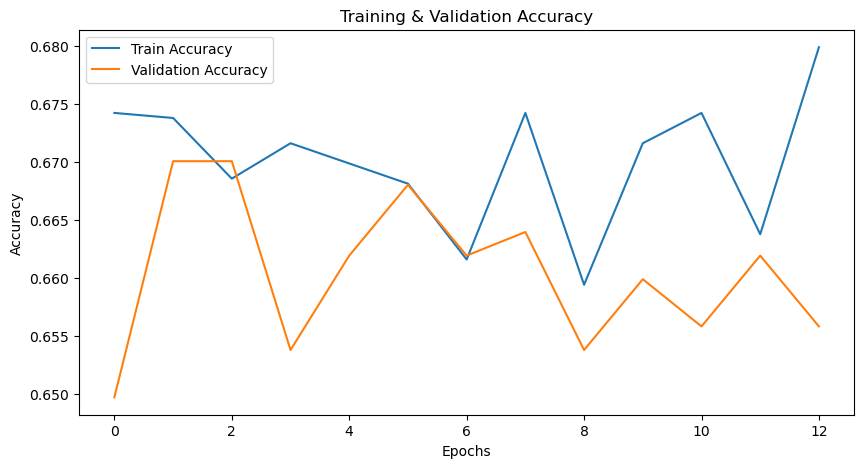

In [34]:

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate model performance
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Compute classification metrics
report = classification_report(y_test, y_pred, output_dict=True)
f1_score = report["1"]["f1-score"]
recall = report["1"]["recall"]
precision = report["1"]["precision"]

# Display results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}")

# Training Summary Table
print("\n### Training Summary Table\n")
print("| Train Instance | Engineer Name | Regularizer | Optimizer | Early Stopping | Dropout Rate | Accuracy | F1 Score | Recall | Precision |")
print("|---------------|--------------|-------------|-----------|---------------|-------------|---------|---------|--------|----------|")
print(f"| Instance 1 | Adedigba Adediwura | Elastic Net (L1 + L2) | SGD | Patience: 5 | 0.3 | {test_accuracy:.4f} | {f1_score:.4f} | {recall:.4f} | {precision:.4f} |")

# Plot training history for better visualization
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()